**Objective:**

The goal of this project is to forecast the stock price of RELIANCE.NS using historical stock data. We'll explore various approaches — from simple statistical methods to advanced machine learning and deep learning models — and compare their performance.

1. **Data Collection:**

We fetch stock price data for RELIANCE.NS from Yahoo Finance using the yfinance API, covering the period from January 2022 to January 2025.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = "2022-01-01"
end = "2025-01-03"
stock = "RELIANCE.NS"

data = yf.download(stock, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2022-01-03,1105.623901,1107.509713,1087.088421,1087.755347,5421611
2022-01-04,1130.575562,1131.909413,1105.692850,1111.166217,10847728
2022-01-05,1135.864868,1139.268478,1119.008139,1132.369407,11643813
2022-01-06,1111.442139,1128.689875,1107.992543,1127.402009,14447422
2022-01-07,1120.411011,1130.552616,1109.165486,1118.088327,13112115
...,...,...,...,...,...
2024-12-27,1221.050049,1227.900024,1217.000000,1218.300049,7000397
2024-12-30,1210.699951,1223.199951,1208.099976,1216.400024,8818766




---



**2. Exploratory Data Analysis (EDA):**

What the Columns Mean

 **Open: The price at which the stock
started trading.**

**High: The highest price reached during the period.**

**Low: The lowest price reached during the period.**

**Close: The price at which the stock ended trading.**

**Volume: The total number of shares traded during a given period.**


*   Visualizing Closing Price Trends





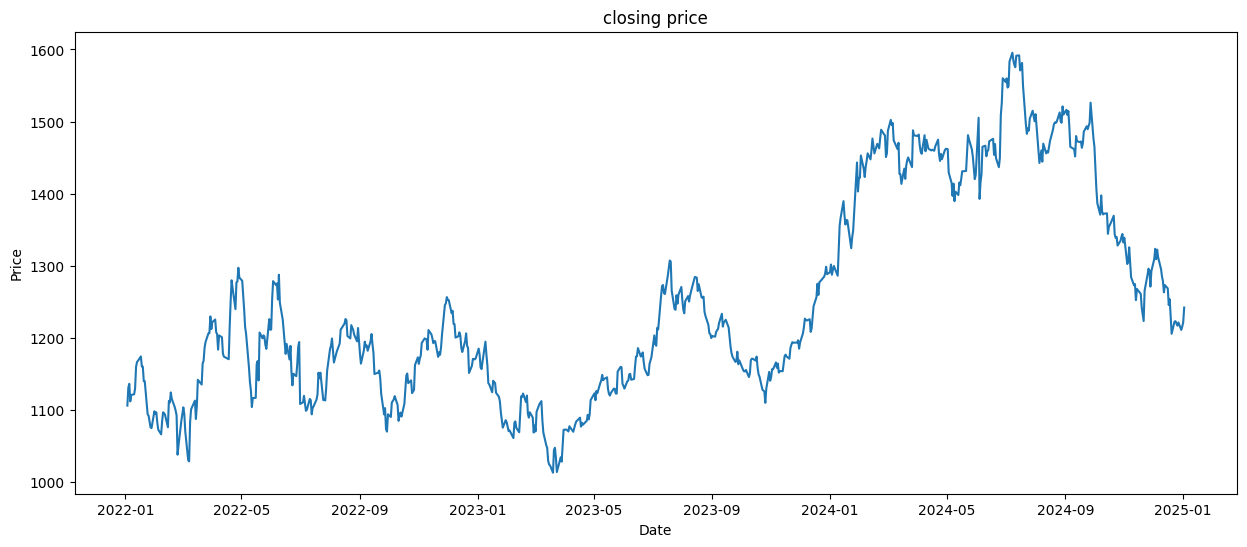

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(data.index ,data.Close)
plt.title(f"closing price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()



*   Stock Trading Volume Over Time



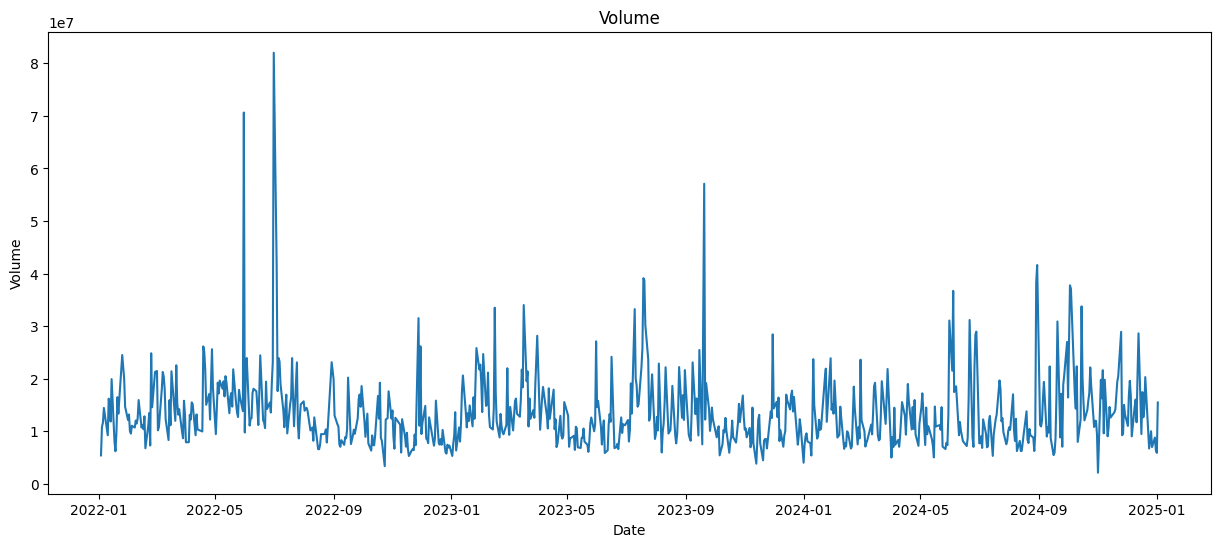

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(data.index, data.Volume)
plt.title(f"Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

# Daily Return of Stock Over Time
This graph represents the percentage change in the stock's closing price from one day to the next.

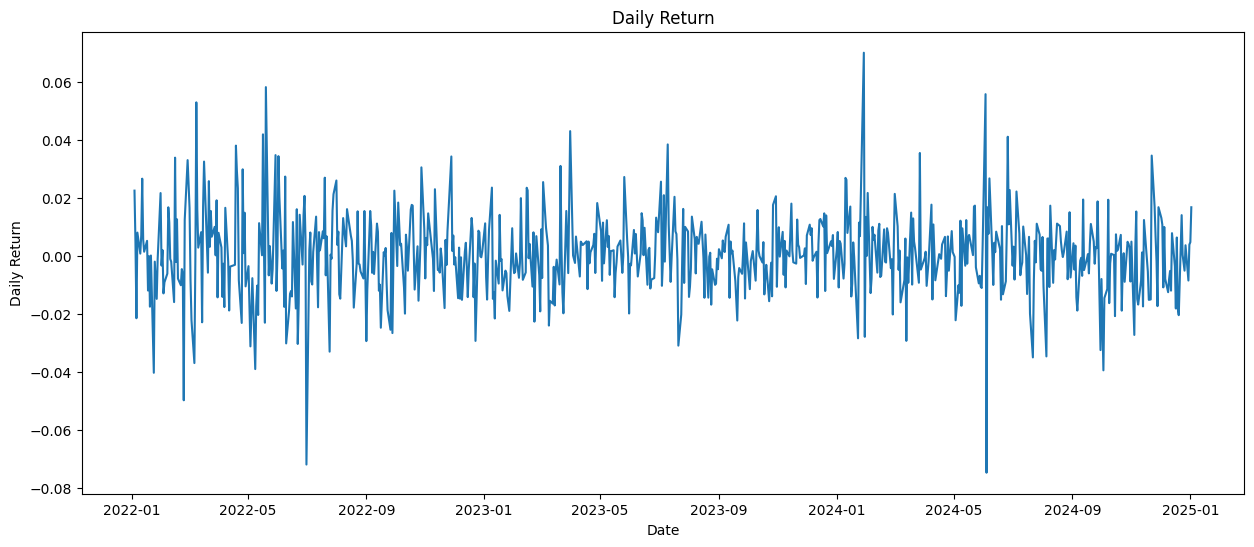

In [ ]:
data['Daily Return'] = data['Close'].pct_change()

plt.figure(figsize=(15,6))
plt.plot(data.index, data['Daily Return'])
plt.title(f"Daily Return")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()

# Prediction using Rolling Means






In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

Price,Date,Close,High,Low,Open,Volume,Daily Return
Ticker,,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,
0,2022-01-03,1105.623901,1107.509713,1087.088421,1087.755347,5421611,NaN
1,2022-01-04,1130.575562,1131.909413,1105.692850,1111.166217,10847728,0.022568
2,2022-01-05,1135.864868,1139.268478,1119.008139,1132.369407,11643813,0.004678
3,2022-01-06,1111.442139,1128.689875,1107.992543,1127.402009,14447422,-0.021501
4,2022-01-07,1120.411011,1130.552616,1109.165486,1118.088327,13112115,0.008070
...,...,...,...,...,...,...,...
736,2024-12-27,1221.050049,1227.900024,1217.000000,1218.300049,7000397,0.003699
737,2024-12-30,1210.699951,1223.199951,1208.099976,1216.400024,8818766,-0.008476
738,2024-12-31,1215.449951,1219.099976,1206.150024,1208.000000,6405475,0.003923


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   (Date, )               741 non-null    datetime64[ns]
 1   (Close, RELIANCE.NS)   741 non-null    float64       
 2   (High, RELIANCE.NS)    741 non-null    float64       
 3   (Low, RELIANCE.NS)     741 non-null    float64       
 4   (Open, RELIANCE.NS)    741 non-null    float64       
 5   (Volume, RELIANCE.NS)  741 non-null    int64         
 6   (Daily Return, )       740 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 40.7 KB


In [ ]:
data.shape

(741, 7)

**Simple Mean Average for 100 days**
*   Smoothes the trend using a simple moving average over 100 days.

In [ ]:
sma = data.Close.rolling(100).mean()

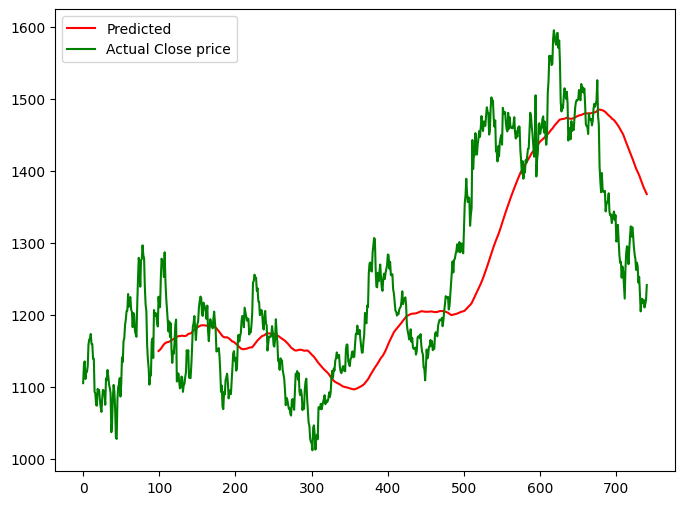

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(sma, 'r',  label="Predicted")
plt.plot(data.Close, 'g', label="Actual Close price")
plt.legend()
plt.show()

**Exponential Mean Average**


*   EMA is a weighted moving average where recent data points are given more importance exponentially.



In [ ]:
ema = data['Close'].ewm(span=100, adjust=False).mean()

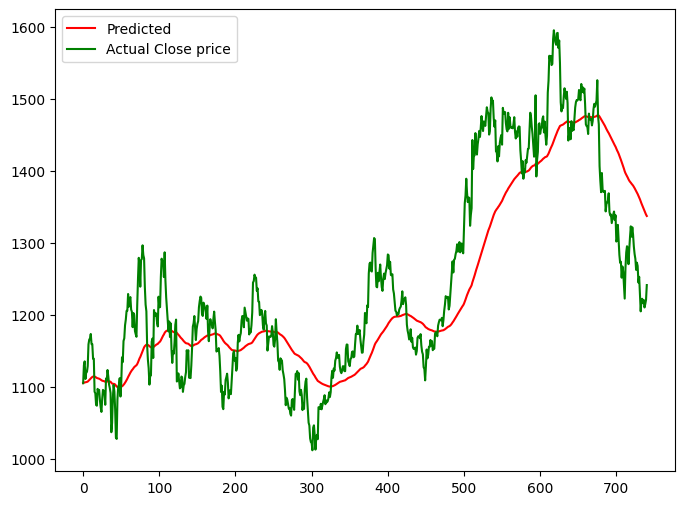

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ema, 'r', label="Predicted")
plt.plot(data.Close, 'g', label="Actual Close price")
plt.legend()
plt.show()

**Weighted Moving Average (WMA)**





*   WMA assigns more weight to recent prices and less to older ones, making it more responsive to recent trends



In [ ]:
weights = np.arange(1,101)
wma = data['Close'].rolling(window=100).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)

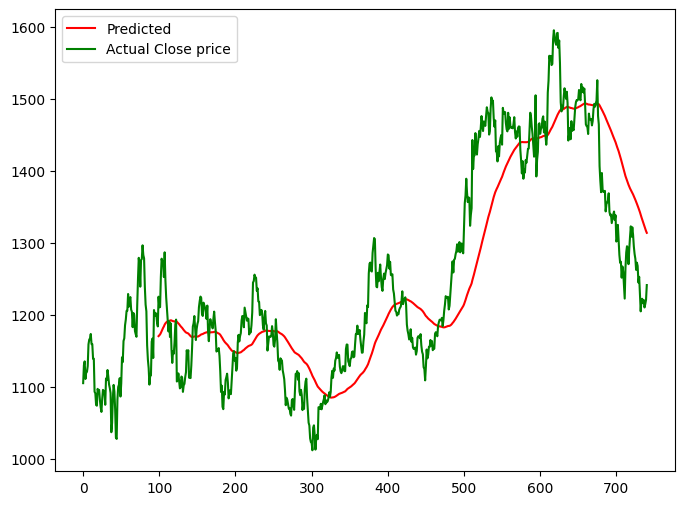

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(wma, 'r', label="Predicted")
plt.plot(data.Close, 'g', label="Actual Close price")
plt.legend()
plt.show()

**Compare Accuracy of Moving Averages**


*    Conclusion based on MAE



In [ ]:
from sklearn.metrics import mean_absolute_error

# Add the existing EMA, WMA, and SMA values as columns to 'data'
 # access the calculated values and assign to a column in 'data'
data['EMA_100'] = ema['RELIANCE.NS']
data['WMA_100'] = wma['RELIANCE.NS']
data['SMA_100'] = sma['RELIANCE.NS']

data.dropna(inplace=True)

ema_mae = mean_absolute_error(data['Close'], data['EMA_100'])
print(f"EMA MAE: {ema_mae}\n")
wma_mae = mean_absolute_error(data['Close'], data['WMA_100'])
print(f"WMA MAE: {wma_mae}\n")
sma_mae = mean_absolute_error(data['Close'], data['SMA_100'])
print(f"SMA MAE: {sma_mae}\n")

# Conclusion based on MAE
if ema_mae < wma_mae and ema_mae < sma_mae:
    print("EMA is most accurate (lower MAE).")
elif wma_mae < ema_mae and wma_mae < sma_mae:
    print("WMA is most accurate (lower MAE).")
else:
    print("SMA is most accurate (lower MAE).")



EMA MAE: 59.195776953174445

WMA MAE: 56.26126938086943

SMA MAE: 69.50317634368612

WMA is most accurate (lower MAE).




---



# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
print(data.isnull().sum())  # Check for missing values

Price         Ticker     
Date                         0
Close         RELIANCE.NS    0
High          RELIANCE.NS    0
Low           RELIANCE.NS    0
Open          RELIANCE.NS    0
Volume        RELIANCE.NS    0
Daily Return                 0
EMA_100                      0
WMA_100                      0
SMA_100                      0
dtype: int64


In [ ]:
features = ['Open', 'High', 'Low', 'Volume']

In [ ]:
X = data[features]
Y = data['Close']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test_scaled)

In [ ]:
lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)

# Print Results
print(f'Mean Absolute Error: {lr_mae}')
print(f'Mean Squared Error: {lr_mse}')
print(f'Root Mean Squared Error: {lr_rmse}')

Mean Absolute Error: 3.846157641131818
Mean Squared Error: 28.163049128437187
Root Mean Squared Error: 5.306886952671706


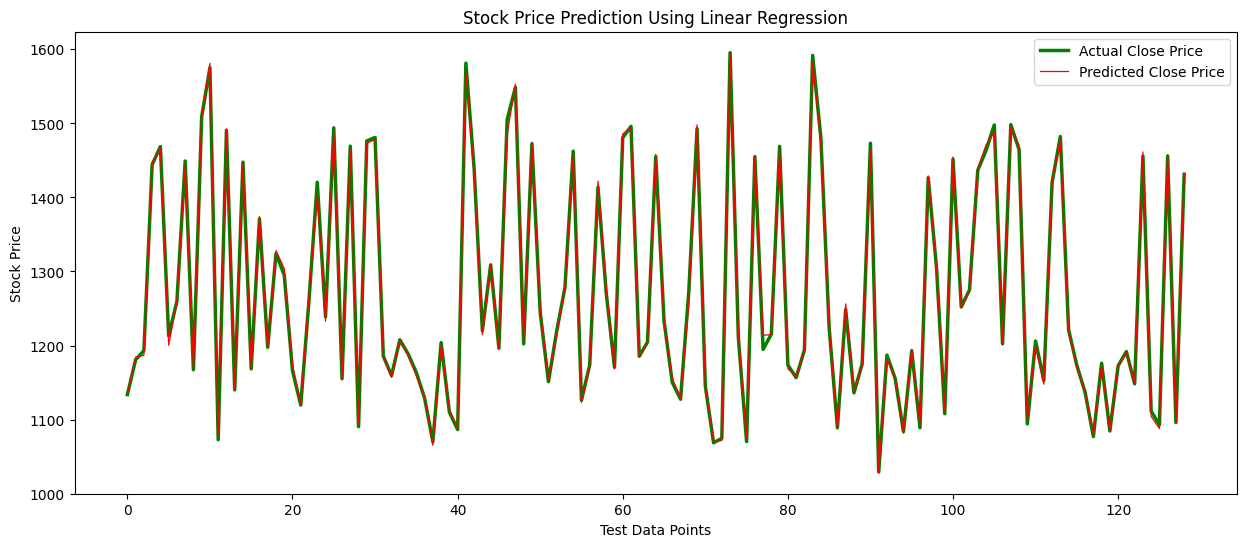

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(y_test.values, label="Actual Close Price", color='g', linewidth=2.5)
plt.plot(y_pred, label="Predicted Close Price", color='r', linewidth=0.9)
plt.legend()
plt.title("Stock Price Prediction Using Linear Regression")
plt.xlabel("Test Data Points")
plt.ylabel("Stock Price")
plt.show()

In [ ]:
# Predict on training set
Y_pred_train = model.predict(x_train_scaled)

# Calculate metrics on training set
mae_train = mean_absolute_error(y_train, Y_pred_train)
mse_train = mean_squared_error(y_train, Y_pred_train)
rmse_train = np.sqrt(mse_train)

# Print training results
print("\n--- Training Set Performance ---")
print(f"Mean Squared Error: {mse_train}")
print(f"Root Mean Squared Error: {rmse_train}")
print(f"Mean Absolute Error of training: {mae_train}\n")

print(f"Mean Absolute Error of testing: {lr_mae}\n")

#Compaing train and testing
if (mae_train) < (lr_mae):
  print("Overfitting")
else:
  print("Not Overfitting\n")

"""The testing error is slightly lower than the training error, which suggests that the model is not overfitting."""


--- Training Set Performance ---
Mean Squared Error: 31.425454878707306
Root Mean Squared Error: 5.6058411392678
Mean Absolute Error of training: 4.2021436578537505

Mean Absolute Error of testing: 3.846157641131818

Not Overfitting



'The testing error is slightly lower than the training error, which suggests that the model is not overfitting.'

RMSE of test > RMSE of train => OVER FITTING of the data.

RMSE of test < RMSE of train => UNDER FITTING of the data.



---



#Limiting Data to to 90 days

In [ ]:
data2 = data.tail(90)

# Feature Selection
features = ['Open', 'High', 'Low', 'Volume']
X2 = data2[features]
Y2 = data2['Close']

# Train-Test Split (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, shuffle=False)

# Train Linear Regression Model
model = LinearRegression()
model.fit(x_train, y_train)

# Make Predictions
y_pred = model.predict(x_test)

# Evaluate Performance
lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)

# Print Results
print(f'Mean Absolute Error: {lr_mae}')
print(f'Mean Squared Error: {lr_mse}')
print(f'Root Mean Squared Error: {lr_rmse}')

Mean Absolute Error: 5.788420679562149
Mean Squared Error: 53.64979863230824
Root Mean Squared Error: 7.324602284923615


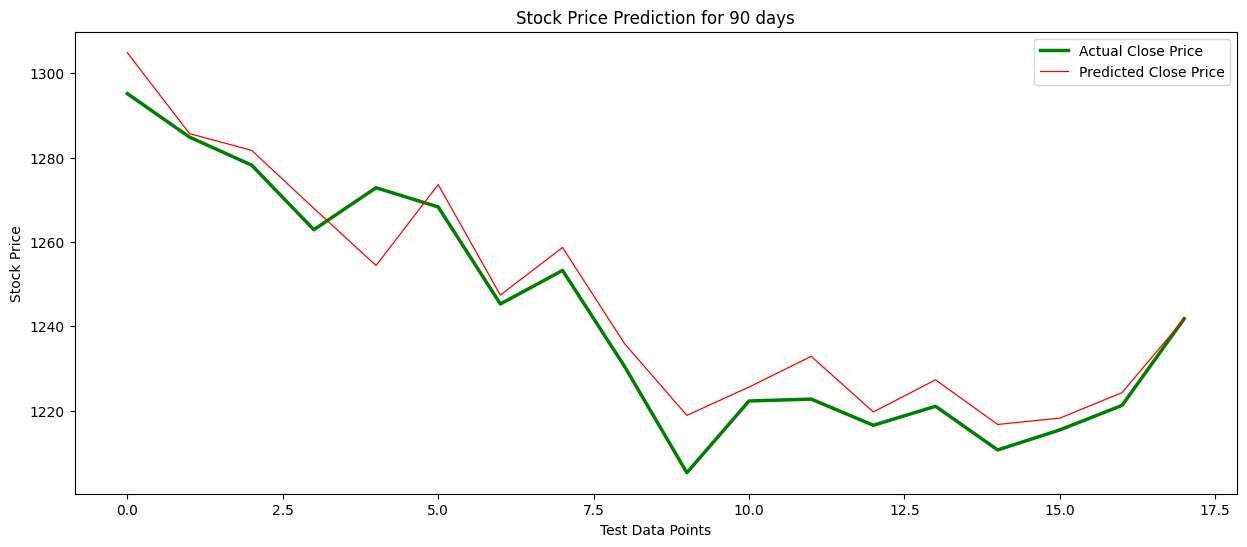

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(y_test.values, label="Actual Close Price", color='g', linewidth=2.5)
plt.plot(y_pred, label="Predicted Close Price", color='r', linewidth=0.9)
plt.legend()
plt.title("Stock Price Prediction for 90 days")
plt.xlabel("Test Data Points")
plt.ylabel("Stock Price")
plt.show()



---



# Using LSTM neural network

*   LSTM is a powerful tool for predicting stock prices because it can remember past prices and detect patterns.



In [ ]:
data.reset_index(inplace=True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])

In [ ]:
sequence_length = 60
X = []
Y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i, 0])
    Y.append(scaled_data[i, 0])

X = np.array(X)
Y = np.array(Y)


In [ ]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

In [ ]:
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dropout(0.1),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=16, validation_data=(X_test, Y_test))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0990 - val_loss: 0.0119
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0094 - val_loss: 0.0070
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0046 - val_loss: 0.0072
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0044 - val_loss: 0.0057
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0036 - val_loss: 0.0051
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0033 - val_loss: 0.0068
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0031 - val_loss: 0.0047
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0037 - val_loss: 0.0041
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0034 - val_loss: 0.0045
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0

In [ ]:
Y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [ ]:
Y_pred_inv = scaler.inverse_transform(Y_pred)
Y_test_inv = scaler.inverse_transform(Y_test.reshape(-1, 1))  #to get back at its orignal shape

In [ ]:
from sklearn.metrics import r2_score
mae_lstm = mean_absolute_error(Y_test_inv, Y_pred_inv)
mse_lstm = mean_squared_error(Y_test_inv, Y_pred_inv)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(Y_test, Y_pred)

print(f"LSTM MAE: {mae_lstm}\n")
print(f'Mean Squared Error (MSE): {mse_lstm:.4f}\n')
print(f'Root Mean Squared Error (RMSE): {rmse_lstm:.4f}\n')
print(f'R² Score: {r2_lstm:.4f}\n')

LSTM MAE: 26.409418611444977

Mean Squared Error (MSE): 1228.7181

Root Mean Squared Error (RMSE): 35.0531

R² Score: 0.8877



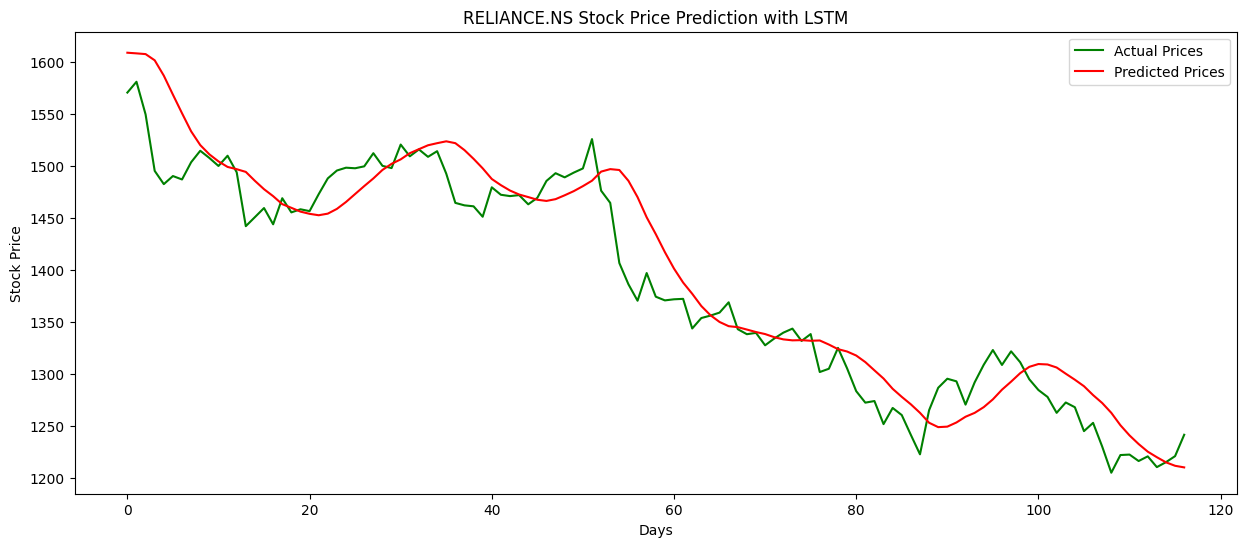

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(Y_test_inv, label="Actual Prices", color="green")
plt.plot(Y_pred_inv, label="Predicted Prices", color="red")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title(f"{stock} Stock Price Prediction with LSTM")
plt.legend()
plt.show()

#**Model Comparison**

In [ ]:
print(f'Mean Absolute Error of WMA: {wma_mae}')
print(f'Mean Absolute Error of LR: {lr_mae}')
print(f'Mean Absolute Error of LSTM: {mae_lstm}')

if wma_mae < lr_mae and wma_mae < mae_lstm:
    print("WMA is most accurate (lower MAE).")
elif lr_mae < wma_mae and lr_mae < mae_lstm:
    print("LR is most accurate (lower MAE).")
else:
    print("LSTM is most accurate (lower MAE).")

Mean Absolute Error of WMA: 56.26126938086943
Mean Absolute Error of LR: 5.788420679562149
Mean Absolute Error of LSTM: 26.409418611444977
LR is most accurate (lower MAE).


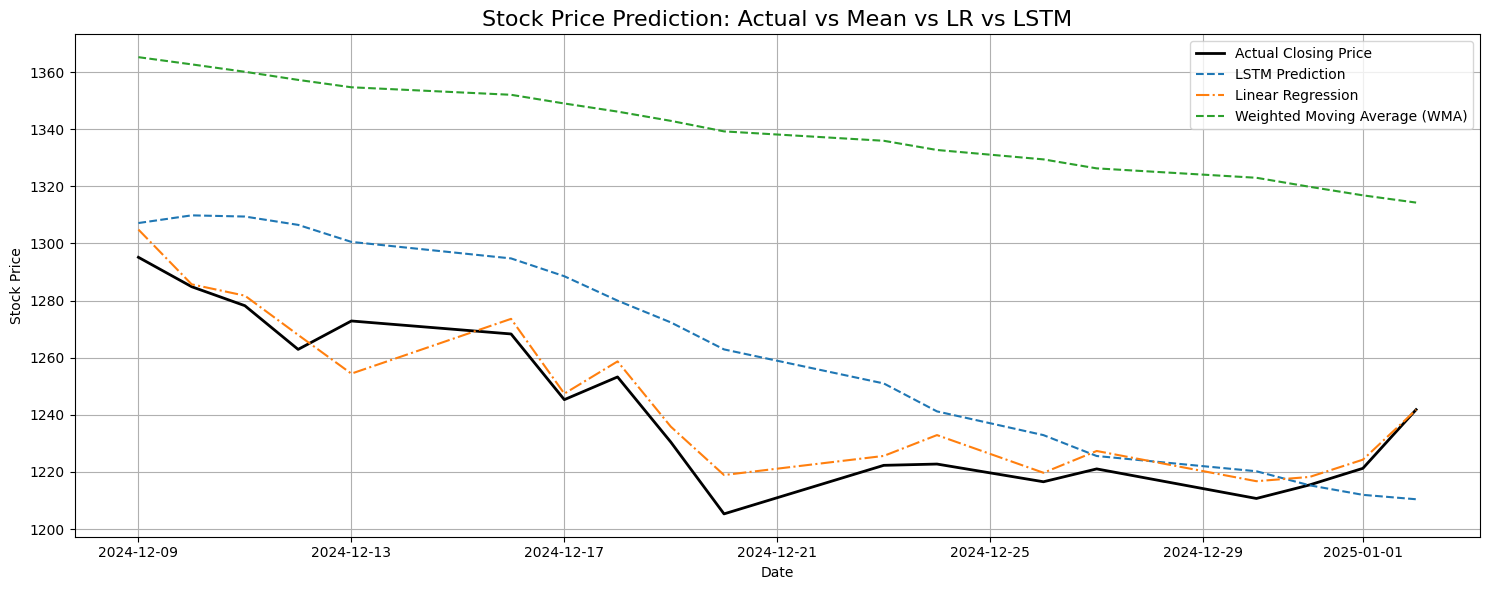

In [ ]:
lr_predictions = y_pred
lstm_predictions = Y_pred_inv

# Align by taking minimum length across all series
min_len = min(len(lr_predictions), len(lstm_predictions), len(wma))

# Trim all series to same length
aligned_dates = data['Date'][-min_len:]
aligned_actual = data['Close'][-min_len:]
aligned_lr = lr_predictions[-min_len:]
aligned_lstm = lstm_predictions[-min_len:]
aligned_wma = wma[-min_len:]

# Plot
plt.figure(figsize=(15, 6))

plt.plot(aligned_dates, aligned_actual, label='Actual Closing Price', color='black', linewidth=2)
plt.plot(aligned_dates, aligned_lstm, label='LSTM Prediction', linestyle='--')
plt.plot(aligned_dates, aligned_lr, label='Linear Regression', linestyle='-.')
plt.plot(aligned_dates, aligned_wma, label='Weighted Moving Average (WMA)', linestyle='--')

plt.title("Stock Price Prediction: Actual vs Mean vs LR vs LSTM", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout() #to adjust padding
plt.show()


## Conclusion

In this project, we explored stock price prediction using two different modeling approaches: **Linear Regression** and **Long Short-Term Memory (LSTM)** networks.

After thorough preprocessing, feature engineering using technical indicators, and careful model evaluation using MAE, RMSE, and R² scores, we found that the **Linear Regression model outperformed the LSTM model** across all key metrics.

This outcome emphasizes the importance of **choosing the right model based on data characteristics and performance**, rather than relying on complexity alone.

> _“In financial time series, simpler models often generalize better, especially when domain features are strong. Our results reaffirm this.”_

Moving forward, this project provides a solid foundation for enhancing model complexity only when the data and problem context demand it.
